In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from matplotlib.ticker import LogFormatter
from matplotlib.ticker import ScalarFormatter
import matplotlib.colors as colors

# Now the map is sorted out, add the data
import pandas as pd
import numpy as np
df = pd.read_csv("data/Questionaire_Responces.csv")
del df['UserID']
del df['UserNo']
del df['Ended']
del df['Q1']
del df['Q4']
del df['Q5']
del df['Q6']
df['Started'] = pd.to_datetime(df['Started'], dayfirst=True)
df = df.set_index(['Started'])
df['Q3.1'] = df['Q3.1. 0 - 7 years old'].replace('-','0').replace(np.NaN,0).astype(int)
df['Q3.2'] = df['Q3.2. 8 - 14 years old'].replace('-','0').replace(np.NaN,0).astype(int)
df['Q3.3'] = df['Q3.3. 15 - 19 years old'].replace('-','0').replace(np.NaN,0).astype(int)
df['Q3.4'] = df['Q3.4. 20 +'].replace('-','0').replace(np.NaN,0).astype(int)
df['Players'] = df['Q3.1']+df['Q3.2']+df['Q3.3']+df['Q3.4']
df['Q2'][df['UK']==1.0] = 'United Kingdom'
df['NAME'] = df['Q2']

df['UK Players'] = df['Players']*df['UK']
df['UK Players'] = df['UK Players'].fillna(0.0)

df['Global Players'] = df['Players']-df['UK Players']
clean_df = df.copy()

start_date = '2020-5-1'
end_date = '2022-10-1'
# set the range, start date set before to pick up any early ones where plotting is problematic
df = clean_df.loc[start_date:end_date]
#df = df.sort_index()

# seperate personal and institutional data
df_ind = df[df['Players']<=10]
df_big = df[df['Players']>10]

/tmp/ipykernel_126/860075071.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Q2'][df['UK']==1.0] = 'United Kingdom'
/tmp/ipykernel_126/860075071.py:38: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df = clean_df.loc[start_date:end_date]


In [2]:
#from IPython.core.display import HTML
#display(HTML(df_big.to_html()))

In [3]:
dates = pd.read_csv("data/important_dates.csv")
dates['Date'] = pd.to_datetime(dates['Date'], dayfirst=True)

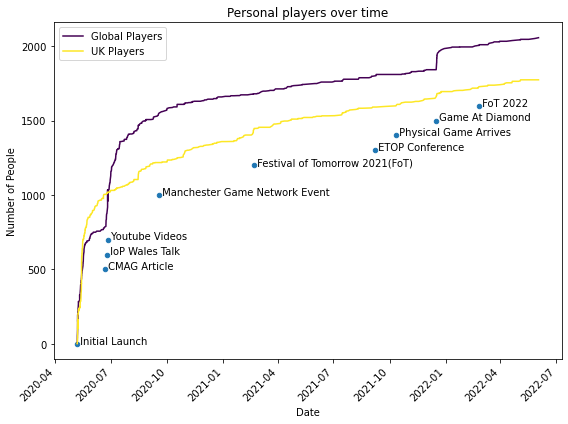

In [4]:
# for the individual data, make a plot of total vrs time
title = "Personal players over time"
df_ind_sum = df_ind[['Global Players', 'UK Players']].cumsum()
ax = df_ind_sum.plot(kind='line', rot=30, colormap=pl.cm.viridis, figsize=(8, 6), title=title)
ax.set_ylabel("Number of People")
dates.plot(ax=ax, kind='scatter', x="Date", y="PPos", rot=45, colormap=pl.cm.viridis, figsize=(8, 6), title=title)
ax.set_ylabel("Number of People")
for index, row in dates.iterrows():
    ax.annotate(row['Event'], (row['Date'], row['PPos']))
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('figures/TotalPlayersOverTime.png', dpi=300)

In [5]:
#display(HTML(df_ind_sum.to_html()))

                     Global Players  UK Players
Started                                        
2020-05-06 22:47:00            50.0         0.0
2020-05-07 00:32:00           400.0         0.0
2020-05-07 10:21:00           430.0         0.0
2020-05-07 10:29:00           430.0        15.0
2020-05-07 13:21:00           430.0       615.0
...                             ...         ...
2022-05-19 15:48:00          5918.0      6673.0
2022-05-23 03:29:00          5948.0      6673.0
2022-05-31 17:43:00          5948.0      6693.0
2022-06-08 16:29:00          5948.0      6755.0
2022-06-09 13:28:00          5964.0      6755.0

[187 rows x 2 columns]


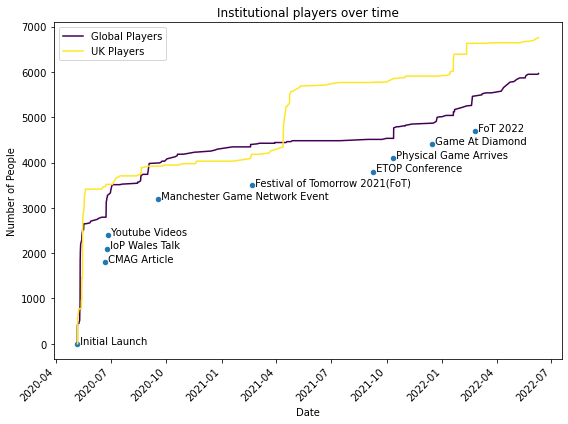

In [6]:
# for the group data, make a plot of total vrs time
title = "Institutional players over time"
df_big_sum = df_big[['Global Players', 'UK Players']].cumsum()
print(df_big_sum)
ax = df_big_sum.plot(kind='line', rot=45, colormap=pl.cm.viridis, figsize=(8, 6), title=title)
ax.set_ylabel("Number of People")
dates.plot(ax=ax, kind='scatter', x="Date", y="IPos", rot=45, colormap=pl.cm.viridis, figsize=(8, 6), title=title)
ax.set_ylabel("Number of People")
for index, row in dates.iterrows():
    ax.annotate(row['Event'], (row['Date'], row['IPos']))
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('figures/TotalGroupsOverTime.png', dpi=300)